In [1]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [2]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

/Users/utkarsh/GitHub/P_NS/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [4]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                   mean       std    median      5.0%     95.0%     n_eff     r_hat
         A[0]      0.79      0.17      0.84      0.55      1.00    358.67      1.00
   alpha_1[0]     -1.82      0.80     -1.70     -3.28     -0.78    353.17      1.00
   alpha_2[0]     -1.53      0.21     -1.53     -1.86     -1.20    346.83      1.00
    beta_1[0]      1.38      0.55      1.29      0.48      2.20    263.29      1.00
    beta_2[0]      2.93      0.82      2.91      1.64      4.34    219.59      1.00
  eta_high[0]     30.31     12.20     31.26     13.08     49.94    481.25      1.00
   eta_low[0]     25.44     14.42     23.65      5.63     49.48    523.45      1.00
   eta_max[0]      5.72      1.81      5.56      2.80      8.60    340.47      1.00
   eta_min[0]     29.56     11.56     29.27     10.23     46.16    605.93      1.00
gamma_high[0]      6.25      0.86      6.28      4.86      7.62    520.72      1.00
 gamma_low[0]      2.63      0.47      2.56      2.00      3.33    405.57  

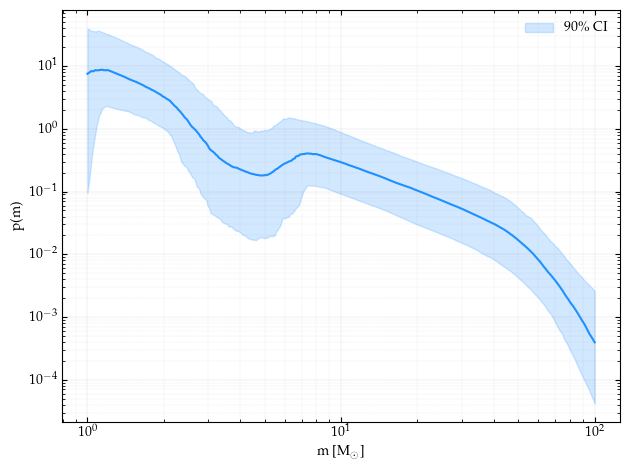

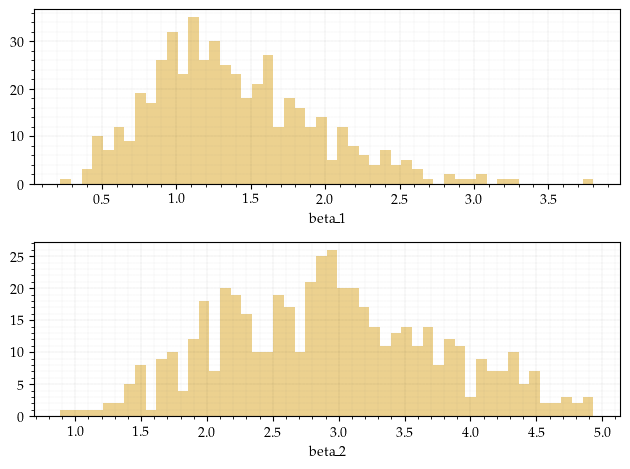

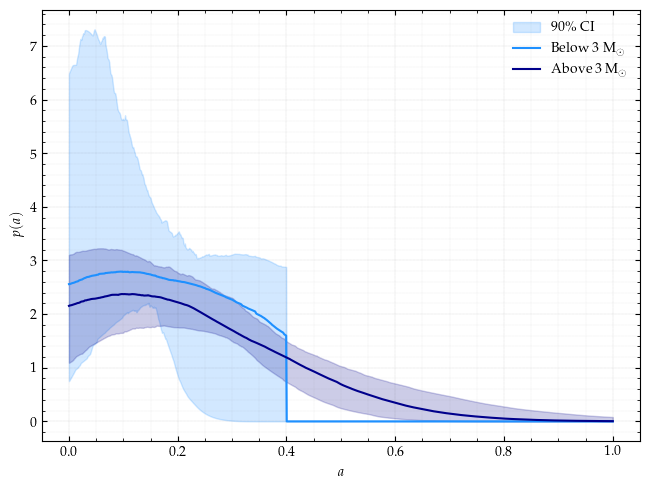

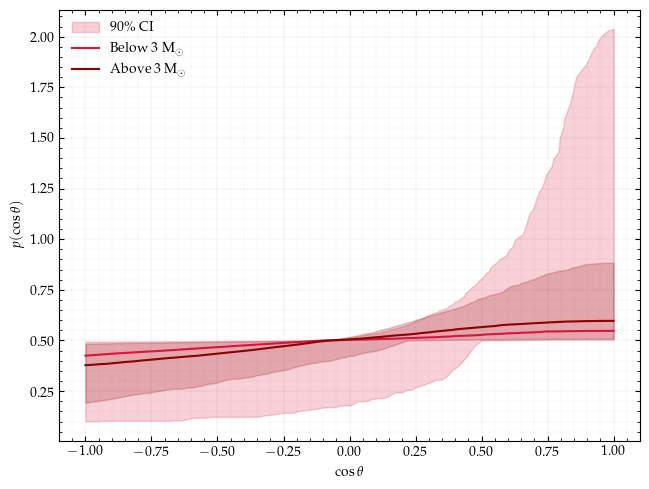

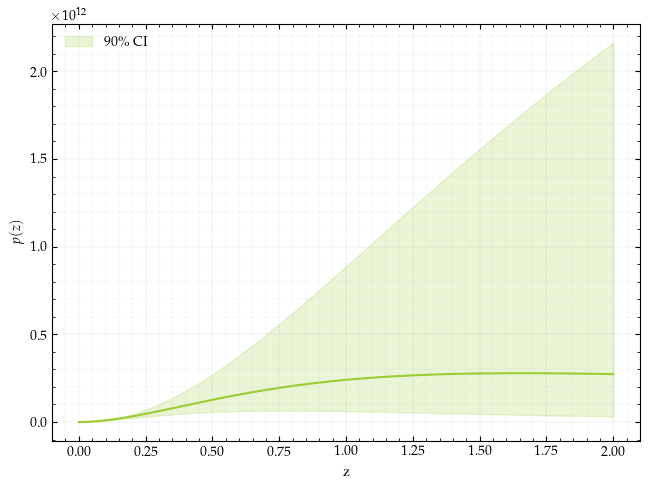

In [5]:
from config.mass1d_func import pdb
from config.spin_func import prob_chi, prob_costilt
from config.distance_func import powerlaw_redshift

plot_p_m(posterior_samples, function=pdb)
plot_p_pairing(posterior_samples)
plot_p_chi(posterior_samples, function=prob_chi)
plot_p_costilt(posterior_samples, function=prob_costilt)
plot_p_z(posterior_samples, function=powerlaw_redshift)
plt.show()

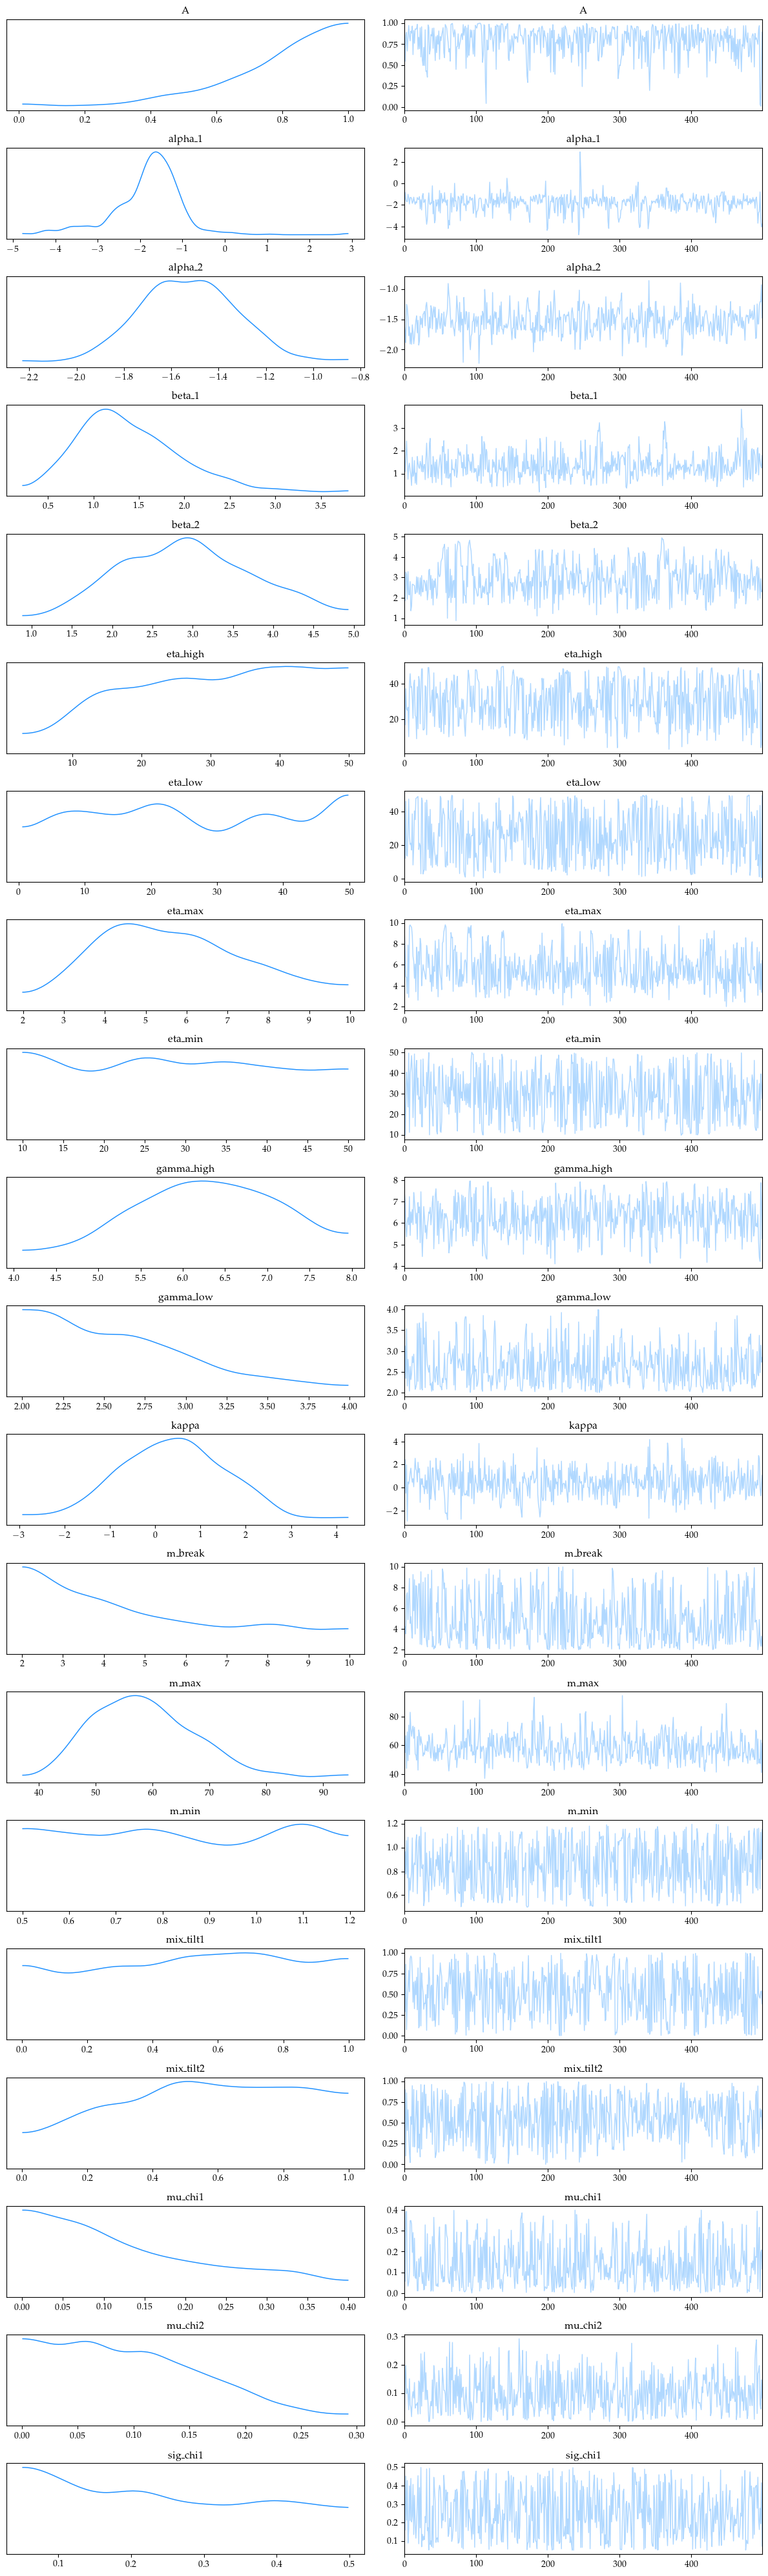

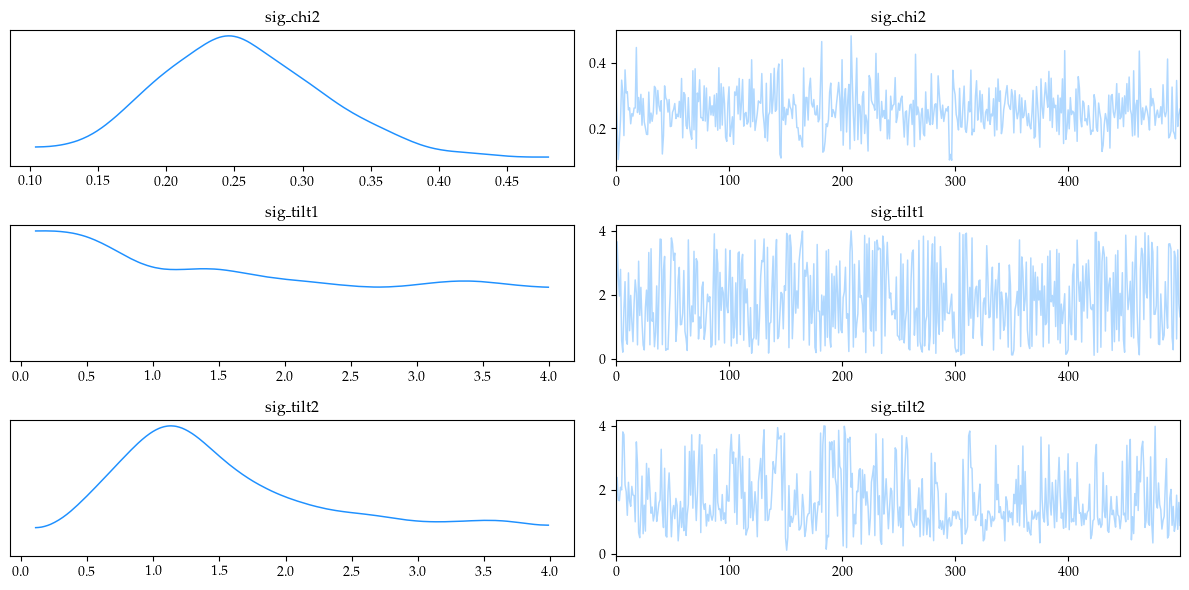

In [6]:
import arviz as az
data = az.from_numpyro(mcmc)
var_names_lst = get_non_deterministic_params(mcmc)

if len(var_names_lst) >= 20:
    cut1 = var_names_lst[:20]
    cut2 = var_names_lst[20:]

    assert len(cut1) + len(cut2) == len(var_names_lst)

    az.plot_trace(data, var_names=cut1, compact=True)
    plt.savefig("results/trace1.png")
    az.plot_trace(data, var_names=cut2, compact=True)
    plt.savefig("results/trace2.png")
else:
    az.plot_trace(data, var_names=var_names_lst, compact=True)
    plt.savefig("results/trace.png")